# University of science
## Advanced Machine Learning - Lab 09
## Nguyễn Quốc Bảo - 18110053

**LAB 09: REFORCEMENT LEARNING**

1. Tìm hiểu về OpenAI
2. Chơi thử trò SmartCar
3. Làm quen với Naive và Q-Learning


* OpenAI là 1 công cụ được tạo ra nhằm giúp những nhà nghiên cứu dễ dàng hơn trong việc có 1 benchmark tốt bằng cách tạo một môi trường ổn định, có cách cài đặt đơn giản. Mục đích của công cụ này là giúp tăng khả năng reproduce lại các kết quả trong lĩnh vực AI, cũng như cung cấp 1 công cụ giúp chúng ta dễ dàng thao tác với các môi trường AI hơn. 


In [ ]:
#Cài đặt thư viện 
!pip install gym

Chúng ta sẽ nói về một environment đơn giản, có số state và số action hữu hạn (và khá nhỏ) là Taxi-v2. Trong environment này, agent của chúng ta đóng vai trò 1 tài xế taxi. Có 4 địa điểm cố định khác nhau trên bản đồ (được ký hiệu R, G, Y, B), và mỗi khi environment bắt đầu, sẽ có 2 điểm bất kỳ là điểm đón và trả khách (2 điểm này có thể trùng nhau), cũng như vị trí của taxi cũng là vị trí bất kỳ. Nhiệm vụ của chúng ta là đón hành khách (ở điểm màu xanh da trời) và trả khách (ở điểm màu tím).

Agent của chúng ta có thể thực hiện 6 actions:

0: xuống dưới

1: lên trên

2: sang trái

3: sang phải

4: đón khách

5: trả khách

Reward của environment này được tính như sau:

cứ sau 1 time step (tức là khi xảy ra bất kỳ action nào), sẽ nhận -1 reward
nhận được +20 reward nếu ta trả khách thành công (nghĩa là time step đó ta sẽ nhận +19 reward)
nếu agent có hành vi đón khách và trả khách không hợp lệ, nhận -10 reward (nghĩa là time step đó ta sẽ nhận -11 reward).

taxi sẽ hoạt động trên một khu vực 5x5, với 4 điểm trả khác và 5 địa điểm hành khách đang đứng nên số states sẽ là 5x5x5x4=500

In [ ]:
import numpy as np
import gym
import time
from IPython.display import clear_output

In [ ]:
env = gym.make("Taxi-v3") #Gọi môi trường ra
env.env.s=env.encode(1,1,2,0)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Hành khách có thể ở 5 điểm là R, G, Y, B và trong xe, màu xanh dương để chỉ địa điểm hành khách đang đứng chờ (nếu hành khác trong taxi thì xe sẽ màu xanh lá), màu tím để chỉ địa điểm cần chở khách đến

In [ ]:
env.env.s=env.encode(2,2,4,1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+



ta sẽ dùng env.encode(số_hàng,số_cột,hành_khách,điểm_trả_khách), với:
* số_hàng thuộc [0,1,2,3,4]
* số_cột thuộc  [0,1,2,3,4]
* hành_khách: 0 là ở R, 1 là ở G, 2 là ở Y, 3 là ở B, 4 là trên xe
* điểm_trả_khách: 0 là ở R, 1 là ở G, 2 là ở Y, 3 là ở B

#Naive-Learning

Bây giờ ta sẽ học Q-table một cách ngây thơ :

* Chọn hành động tốt nhất dựa vào những gì đã học
* Nếu điểm bằng nhau thì chọn ngẫu nhiên
* Q-table cập nhất với discount = 0 (không xem xét tương lai)


Đầu tiên ta phải tạo ra một q-table là ma trận $size\_state\times size\_action$

In [ ]:
state_size = env.observation_space.n
action_size = env.action_space.n

q_table = np.zeros((state_size, action_size))

FILE_SAVE_Naive = "q_table_naive.npy"
total_episodes = 5000       # Total episodes
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode
           # Exponential decay rate for exploration prob

In [ ]:
import time
for episode in range(total_episodes):
    state = env.reset()   # reset lại môi trường
    done = False          # đã hoàn thành trả khách hay chưa
    for step in range(max_steps):
        clear_output(wait=True)
        print("episode: ",episode)
        if  np.max(q_table[state]) ==0:         # nếu trong state q_value đều bằng 0 thì chọn đại 1 action
            action=np.random.randint(0,action_size)
        else:
            action = np.argmax(q_table[state])  # chọn action có q_value lớn nhất

        new_state, reward, done, _ = env.step(action)   # thực hiện hành động để nhận reward và state, action mới

        q_table[state,action] += reward # cập nhật q_table
        state = new_state
        if done:       # nếu taxi có hành vi trả khách thì kết thúc episode
            break

episode:  4999


In [ ]:
# lưu lại q_table
np.save(FILE_SAVE_Naive,q_table)

In [ ]:
# từ q_table bắt đầu chơi thử
q_table=np.load("q_table_naive.npy")
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    

    for step in range(max_steps):
        print("****************************************************")
        print("EPISODE ", episode)
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        env.render() # hiển thị trò chơi
        total_rewards += reward
        print(total_rewards)
        time.sleep(0.5)
        clear_output(wait=True)
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state


Score over time: 0.0


In [ ]:
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

In [ ]:
q_table

array([[   0.,    0.,    0.,    0.,    0.,    0.],
       [-251., -251., -251., -250., -250., -250.],
       [-208., -208., -208., -208., -208., -210.],
       ...,
       [-124., -124., -123., -123., -130., -130.],
       [-141., -141., -140., -140., -140., -140.],
       [ -20.,  -20.,  -19.,  -19.,  -20.,  -30.]])

# Q-Learning

Giá trị Q-value được cập nhật như sau:$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha [r_{t+1} + \lambda \max_{a}Q(s_{t+1}, a) - Q(s_t, a_t)]$$với $\alpha$ là learning rate, $\lambda$ là discount rate, $s_t$ là quan sát thời điểm $t$ và $r_{t+1}$ là phần thưởng sau khi thực hiện hành động $a_t$ với quan sát $s_t$.

Ngoài ra agent sẽ ngẫu nhiên thực hiện exploration với xác suất nào đó ở những state ban đầu

In [ ]:
env = gym.make("Taxi-v3")
state_size = env.observation_space.n
print(state_size)
action_size = env.action_space.n
print(action_size)

500
6


In [ ]:

env = gym.make("Taxi-v3")
state_size = env.observation_space.n
action_size = env.action_space.n

q_table = np.zeros((state_size, action_size))

FILE_SAVE_Qlearning = "q_table_qlearning.npy"
total_episodes = 5000         # Total episodes
total_test_episodes = 10    # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
discount_rate = 0.95         # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [ ]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
import time
for episode in range(total_episodes):
    state = env.reset()
    done = False
    clear_output(wait=True)
    print("episode: ",episode)
    for step in range(max_steps):
        #clear_output(wait=True)
        
        epsilon = min(min_epsilon, epsilon*decay_rate)
        # kiểm tra xem agent dùng exploi hay explor
        if np.random.rand() < epsilon:
            # exploration
            action = np.random.randint(0, action_size)
        else:
            # exploitation
            if np.max(q_table[state]) == 0:
                action=np.random.randint(0,action_size)
            else:
                action = np.argmax(q_table[state])
            
        # nhận reward và state tiếp theo
        new_state, reward, done, _ = env.step(action)

        # cập nhật q_table theo Bellman equation
        update = reward + discount_rate*q_table[new_state].max() - q_table[state,action]
        q_table[state,action] = q_table[state,action] + learning_rate*update
        state = new_state
        if done:
            break

episode:  4999


In [ ]:
# lưu lại q_table
np.save(FILE_SAVE_Qlearning,q_table)

In [ ]:
# từ q_table bắt đầu chơi thử
#q_table = np.load("q_table_qlearning.npy")
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    

    for step in range(max_steps):
        print("****************************************************")
        print("EPISODE ", episode)
        
        action = np.argmax(q_table[state,:])
        new_state, reward, done, info = env.step(action)
        env.render() # hiển thị trò chơi
        total_rewards += reward
        print(total_rewards)
        time.sleep(0.5)
        clear_output(wait=True)
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
        
# env.close()
# print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

****************************************************
EPISODE  9
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
-99


In [ ]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-5.46566072, -5.64429798, -5.6077611 , -5.48637774,  5.20997639,
        -7.        ],
       [-4.78898712, -4.5840672 , -4.47236866, -4.41448387, 10.9512375 ,
        -9.73      ],
       ...,
       [-2.65639999, -2.37968605, -2.22291475, -2.79375875, -9.919     ,
        -9.9757    ],
       [-4.6502047 , -4.72978337, -4.5840672 , -4.81579966, -7.        ,
        -7.        ],
       [ 0.        , -0.7       ,  0.        , 18.        , -9.1       ,
        -7.        ]])

#Bài tập

1. Giải thích vì sao khi dùng Naive-Learning thì xe taxi chỉ đứng yên một chỗ?
2. Giải thích vì sao khi dùng Q-Leaning thì xe taxi có thể đón và trả khách được?
3. Tìm hiểu một game khác trên OpenAI và thiết lập cho agent chơi được

1. Khi dùng Naive-Learning

Vì thực hiện các action chỉ lựa chọn theo giá trị tốt nhất và chỉ khi giá trị q-value tại state đó đều bằng 0 thì agent sẽ chọn action một cách ngẫu nhiên, nên trường hợp agent bị đứng yên là do khi đó giá trị hiện tại đang là tốt nhất nên nó sẽ chọn state đó.

2. Khi dùng Q-Leaning

Chia ra 2 trường hợp exploitation (lựa chọn action tốt nhất) và exploration (chọn action một cách ngẫu nhiên), ban đầu agent sẽ cố gắng exploration nhiều nhất có thể để có các giá trị reward và state value tương ứng. Sau đó mới chuyển sang exploitation để tối ưu các action tốt nhất. Chính vì thế khác với Naive-leaning, giai đoạn ban đầu thực hiện exploration nhiều action và cố gắng exploiration về sau đạt được reward tốt nhất nên có thể đón và trả khách.   



3.

Car_Pole là một con lắc có trọng tâm nằm trên điểm quay của nó. Nó không ổn định, nhưng có thể được kiểm soát bằng cách di chuyển điểm trục xuống dưới tâm khối lượng. Mục đích là để giữ cân bằng cartpole bằng cách tác dụng các lực thích hợp lên một điểm trục.

Cột được gắn bằng một khớp vào xe đẩy, khớp này di chuyển dọc theo đường ray. Hệ thống được điều khiển bằng cách tác dụng một lực theo hướng trái hoặc phải vào giỏ hàng. Con lắc bắt đầu thẳng đứng, và mục đích là ngăn nó rơi xuống. Phần thưởng +1 được cung cấp cho mỗi bước thời gian mà cột vẫn thẳng đứng. Tập kết thúc khi cột lệch hơn 15 độ so với phương thẳng đứng hoặc xe đẩy cách tâm hơn 2,4 đơn vị. Khi reward >195 chúng ta cũng sẽ kết thúc việc huấn luyện

actions ở một state chính là 2 là lực tác động vào trò chơi theo hướng phải hay hướng trái.

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 400))
display.start()

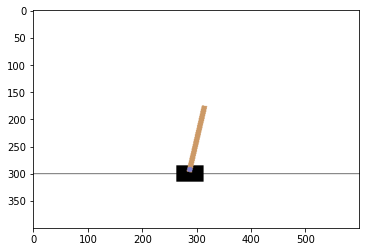

In [ ]:
env = gym.make("CartPole-v1")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()


In [ ]:
# display.stop()

In [ ]:
LEARNING_RATE = 0.1
FILE_SAVE_Qlearning = "CartPole_q_table_qlearning.npy"
DISCOUNT = 0.95
EPISODES = 20000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 1

epsilon_decay_value = 0.99995
test_episodes = 10

In [ ]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [ ]:
def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [ ]:

for episode in range(EPISODES + 1): # go through the episodes
    t0 = time.time() # set the initial time
    discrete_state = get_discrete_state(env.reset()) # get the discrete start for the restarted environment 
    done = False
    episode_reward = 0 # reward starts as 0 for each episode

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:
            # exploitation
            action = np.argmax(q_table[discrete_state]) # take cordinated action
        else:
            # exploration
            action = np.random.randint(0, env.action_space.n) # do a random ation

        new_state, reward, done, _ = env.step(action) # step action to get new states, reward, and the "done" status.

        episode_reward += reward # add the reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % 2000 == 0: # render
            env.render()

        if not done: # update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: # epsilon modification
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() # episode has finished
    episode_total = t1 - t0 # episode total time
    total = total + episode_total

    total_reward += episode_reward # episode total reward
    prior_reward = episode_reward

    if episode % 1000 == 0: # every 1000 episodes print the average time and the average reward
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0


Episode: 0
Time Average: 0.00011224603652954101
Mean Reward: 0.017
Time Average: 0.0009931690692901612
Mean Reward: 22.354
Episode: 2000
Time Average: 0.0009659392833709717
Mean Reward: 21.671
Time Average: 0.000949415922164917
Mean Reward: 21.824
Episode: 4000
Time Average: 0.000975822925567627
Mean Reward: 22.246
Time Average: 0.0009504084587097168
Mean Reward: 22.19
Episode: 6000
Time Average: 0.0009934237003326415
Mean Reward: 22.932
Time Average: 0.000912360429763794
Mean Reward: 22.11
Episode: 8000
Time Average: 0.000960597276687622
Mean Reward: 22.113
Time Average: 0.0009566988945007325
Mean Reward: 22.192
Episode: 10000
Time Average: 0.0009985804557800294
Mean Reward: 22.25
Epsilon: 0.9512282354250458
Time Average: 0.0009996068477630615
Mean Reward: 23.381
Episode: 12000
Time Average: 0.0010502233505249024
Mean Reward: 23.512
Epsilon: 0.8824941446941661
Time Average: 0.0011073687076568603
Mean Reward: 24.688
Epsilon: 0.8394533480303666
Episode: 14000
Time Average: 0.00119771409

In [ ]:
# lưu lại q_table
np.save(FILE_SAVE_Qlearning,q_table)

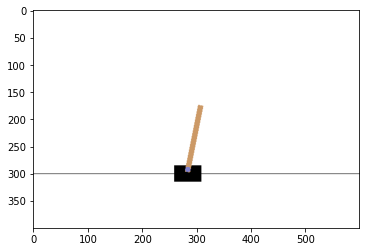

****************************************************
EPISODE  9
25.0


In [ ]:
# từ q_table bắt đầu chơi thử
#q_table = np.load("CartPole_q_table_qlearning.npy")
rewards = []

for episode in range(test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    

    for step in range(100):
        print("****************************************************")
        print("EPISODE ", episode)
        
        ##########
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        total_rewards += reward
        print(total_rewards)
        time.sleep(0.01)
        screen = env.render(mode='rgb_array')

        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())
        
        if done:
            rewards.append(total_rewards)
            # print ("Score", total_rewards)
            break
        state = new_state
        
env.close()
# print ("Score over time: " +  str(sum(rewards)/test_episodes))